In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [53]:
data = pd.read_csv("HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


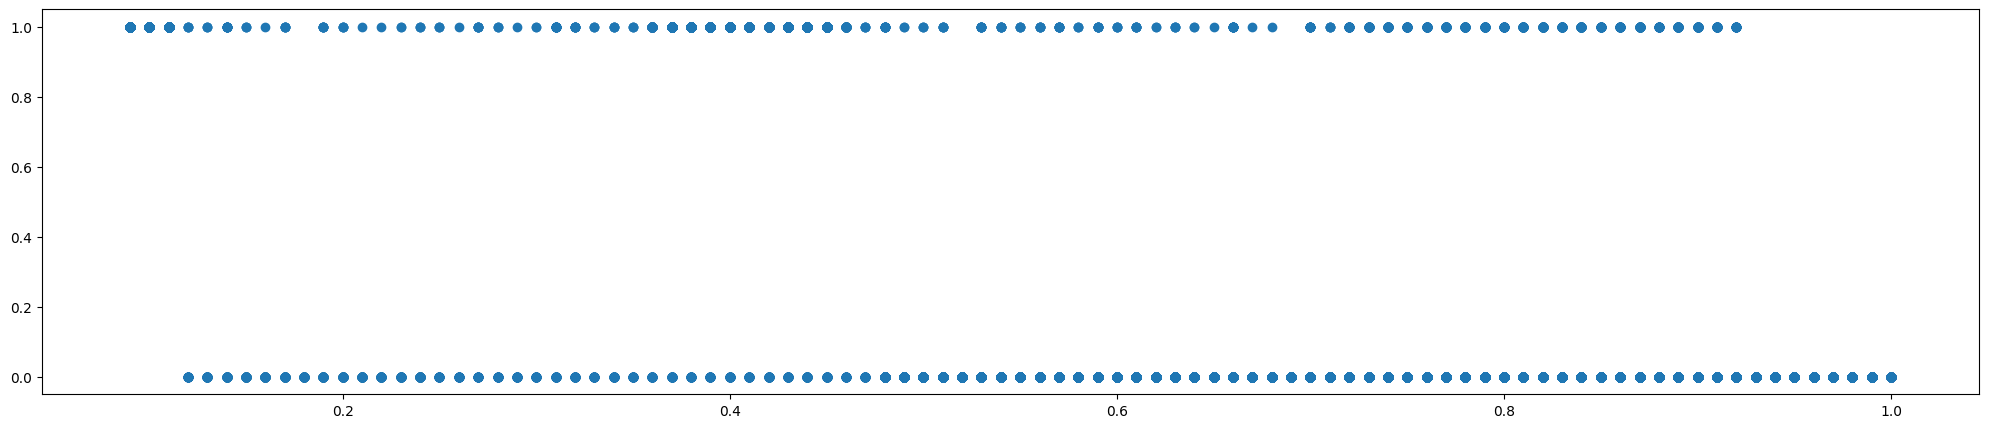

In [5]:
plt.figure(figsize=(25,5))
plt.scatter(data.satisfaction_level , data .left)

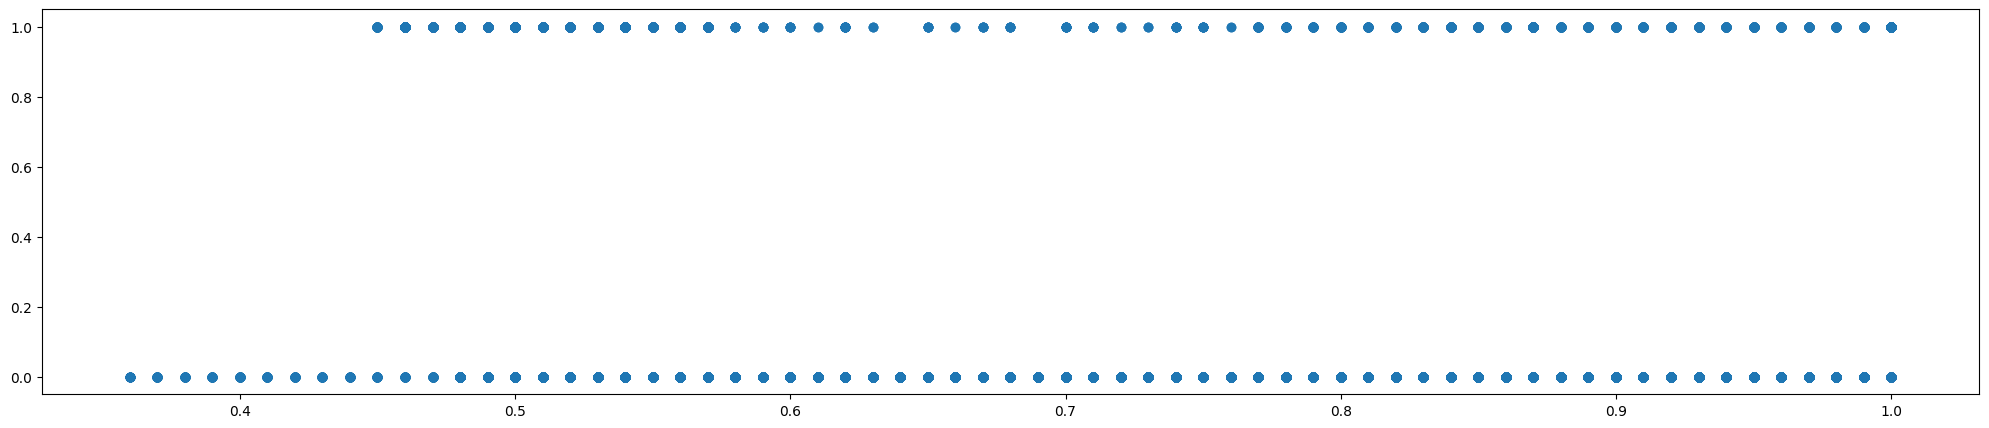

In [6]:
plt.figure(figsize=(25,5))
plt.scatter(data.last_evaluation , data .left)

In [7]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [14]:
data_proj_cumm_cnt = data.groupby(by="number_project" , as_index=False).count()
data_proj_cumm_cnt

,number_project,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,2,2388,2388,2388,2388,2388,2388,2388,2388,2388
1,3,4055,4055,4055,4055,4055,4055,4055,4055,4055
2,4,4365,4365,4365,4365,4365,4365,4365,4365,4365
3,5,2761,2761,2761,2761,2761,2761,2761,2761,2761
4,6,1174,1174,1174,1174,1174,1174,1174,1174,1174
5,7,256,256,256,256,256,256,256,256,256


In [15]:
data_proj_cumm_sum = data.groupby(by="number_project" , as_index=False).sum()
data_proj_cumm_sum

,number_project,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,2,1143.30,1357.59,382898,7595,222,1567,37,salessalessalessalessalessalessalessalessaless...,lowlowlowlowlowlowlowlowlowlowlowlowlowlowlowl...
1,3,2788.50,2905.70,800893,13327,710,72,95,technicalsupporthrsupportsupportRandDtechnical...,lowlowmediumlowlowmediumlowmediummediumhighlow...
2,4,3034.25,3230.14,895358,15081,683,409,117,salessalessaleshrtechnicalproduct_mngmanagemen...,lowlowlowlowlowmediumlowlowmediummediumlowlowl...
3,5,1874.41,2103.91,585502,10492,416,612,50,salessalessalessalessalessalestechnicalmanagem...,mediumlowlowlowlowlowlowmediummediummediumlowl...
4,6,321.04,923.41,280227,4922,134,655,20,salessalessalessalesaccountingtechnicaltechnic...,lowlowlowlowlowlowlowlowlowlowmediummediummedi...
5,7,30.39,220.06,70676,1053,4,256,0,salestechnicalsupportsupportITproduct_mngprodu...,mediumlowlowlowmediumlowmediummediummediumlowl...


In [23]:
data_proj_cumm.left = data_proj_cumm_sum.left/data_proj_cumm_cnt.left * 100

In [24]:
data_proj_cumm

,number_project,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,2,2388,2388,2388,2388,2388,65.619765,2388,2388,2388
1,3,4055,4055,4055,4055,4055,1.775586,4055,4055,4055
2,4,4365,4365,4365,4365,4365,9.369989,4365,4365,4365
3,5,2761,2761,2761,2761,2761,22.165882,2761,2761,2761
4,6,1174,1174,1174,1174,1174,55.792164,1174,1174,1174
5,7,256,256,256,256,256,100.000000,256,256,256


<BarContainer object of 6 artists>

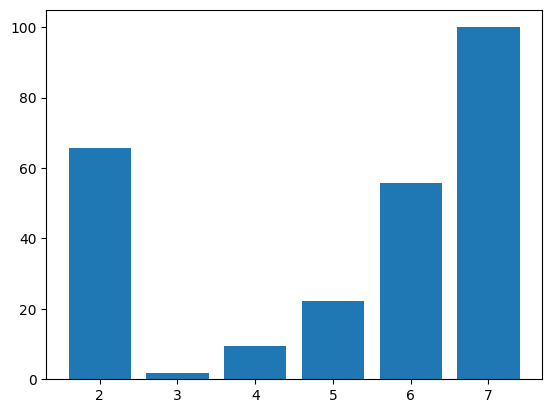

In [26]:
plt.bar(data_proj_cumm.number_project , data_proj_cumm.left)

In [27]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [33]:
data_hours_cumm = data.groupby(by="left")["average_montly_hours"].mean()
data_hours_cumm

left
0    199.060203
1    207.419210
Name: average_montly_hours, dtype: float64

In [34]:
data.groupby(by="left")["average_montly_hours"].min()

left
0     96
1    126
Name: average_montly_hours, dtype: int64

In [35]:
data.groupby(by="left")["average_montly_hours"].max()

left
0    287
1    310
Name: average_montly_hours, dtype: int64

In [36]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [39]:
data_time_cumm = data.groupby(by="time_spend_company" , as_index=False).sum()
data_time_cumm

,time_spend_company,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,left,promotion_last_5years,Department,salary
0,2,2261.32,2327.88,11962,649232,558,53,54,supporttechnicalsalesITaccountingsalestechnica...,lowmediumlowmediummediumlowmediummediumlowlowm...
1,3,4035.34,4308.57,21441,1202476,895,1586,134,salessalessalessalessalessalessalessalessaless...,lowlowlowlowlowlowlowlowlowlowlowlowlowlowlowl...
2,4,1195.44,1963.59,11833,571375,318,890,35,salessalessalessalessalesaccountingtechnicalte...,mediumlowlowlowlowlowlowlowlowlowlowlowlowlowm...
3,5,898.98,1198.53,6657,328448,171,833,17,salessalessalessalessalessalessalestechnicalte...,lowlowlowlowlowlowlowlowlowmediummediummediuml...
4,6,433.27,542.00,3025,152253,107,209,17,salessaleshrsupportproduct_mngmarketingsaleste...,mediumlowlowlowmediumlowmediumlowlowmediumlowl...
5,7,119.56,128.36,724,37740,26,0,36,salessalessalessalessalesmanagementmanagementm...,mediummediummediumhighmediummediummediummedium...
6,8,107.74,115.34,612,31396,44,0,10,marketingsalesaccountingsupporttechnicalmanage...,mediummediummediummediummediummediummediummedi...
7,10,140.24,156.54,788,42634,50,0,16,managementsalesmarketingsalessalessalessalessa...,mediummediumlowhighlowhighhighlowlowlowlowlowh...


In [40]:
data_time_cumm_sum = data.groupby(by="time_spend_company" , as_index=False).sum()
data_time_cumm_cnt = data.groupby(by="time_spend_company" , as_index=False).count()
data_time_cumm_cnt

,time_spend_company,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,left,promotion_last_5years,Department,salary
0,2,3244,3244,3244,3244,3244,3244,3244,3244,3244
1,3,6443,6443,6443,6443,6443,6443,6443,6443,6443
2,4,2557,2557,2557,2557,2557,2557,2557,2557,2557
3,5,1473,1473,1473,1473,1473,1473,1473,1473,1473
4,6,718,718,718,718,718,718,718,718,718
5,7,188,188,188,188,188,188,188,188,188
6,8,162,162,162,162,162,162,162,162,162
7,10,214,214,214,214,214,214,214,214,214


In [41]:
data_time_cumm_sum.left/data_time_cumm_cnt.left * 100 

0     1.633785
1    24.615862
2    34.806414
3    56.551256
4    29.108635
5     0.000000
6     0.000000
7     0.000000
Name: left, dtype: float64

In [42]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [84]:
data.drop([ "last_evaluation"],inplace=True,axis=1)

In [71]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,False,False,False,False,False,False,False,False,True,False,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,False,False,False,False,False,False,False,False,True,False,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,False,False,False,False,False,False,False,False,True,False,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,False,False,False,False,False,False,False,False,True,False,False,True,False


In [67]:
print(data.shape)
print(dummies.shape)
print(pd.read_csv("HR_comma_sep.csv").shape)


(29998, 19)
(14999, 10)
(14999, 10)


In [87]:
data=pd.read_csv("HR_comma_sep.csv")
dummies = pd.get_dummies(data.Department)
data.drop("Department" , axis=1,inplace=True)
data = pd.concat([data,dummies],axis=1)

dummies = pd.get_dummies(data.salary)
data.drop("salary" , axis=1,inplace=True)
data = pd.concat([data,dummies],axis=1)

In [88]:
reg = LogisticRegression(max_iter=10000)
xtrain,xtest,ytrain,ytest = train_test_split(data.drop("left" , axis=1) , data.left,test_size=.2)
reg.fit(xtrain,ytrain)
reg.score(xtest,ytest)

0.798